# Módulo 30 - K-Means
**Atividade:**

Nesta tarefa, vamos explorar o algoritmo de clustering K-means aplicado a um contexto diferente do usual. Em vez de segmentar perfis de viajantes ou clientes de e-commerce, vamos usar dados biológicos para segmentar diferentes espécies de pinguins com base em características físicas. Esta abordagem destaca a versatilidade do K-means para diversas áreas além de vendas e marketing.

A base de dados utilizada é a penguins do pacote seaborn, que contém informações sobre três espécies de pinguins: Adelie, Chinstrap e Gentoo. As variáveis disponíveis incluem medições físicas dos pinguins coletadas na Antártica.

species: Espécie do pinguim (Adelie, Chinstrap, Gentoo)

island: Ilha onde o pinguim foi observado (Biscoe, Dream, Torgersen)

bill_length_mm: Comprimento do bico em milímetros

bill_depth_mm: Profundidade do bico em milímetros

flipper_length_mm: Comprimento da barbatana em milímetros

body_mass_g: Massa corporal em gramas

sex: Sexo do pinguim (Male, Female)

year: Ano em que a observação foi feita

In [82]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [83]:
penguins = sns.load_dataset('penguins')

In [84]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# 1 - Nesse exercício vocês devem verificar se temos variáveis missing, faltantes e excluir esses valores do dataset, também devem excluir as colunas com valores categóricos, que não utilizazam para o Kmeans.

In [85]:
penguins.drop(['island', 'sex'], axis = 1, inplace = True)
penguins.dropna(axis = 0, inplace = True)


In [86]:
#Verificando se há valores nulos após o tratamento
penguins.isnull().sum()


species              0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64

# 2 - Visualize a análise descritiva dos seus dados utilizando a função vista em aula pairplot. É possível já identificar possíveis agrupamentos? Se sim, quantos?

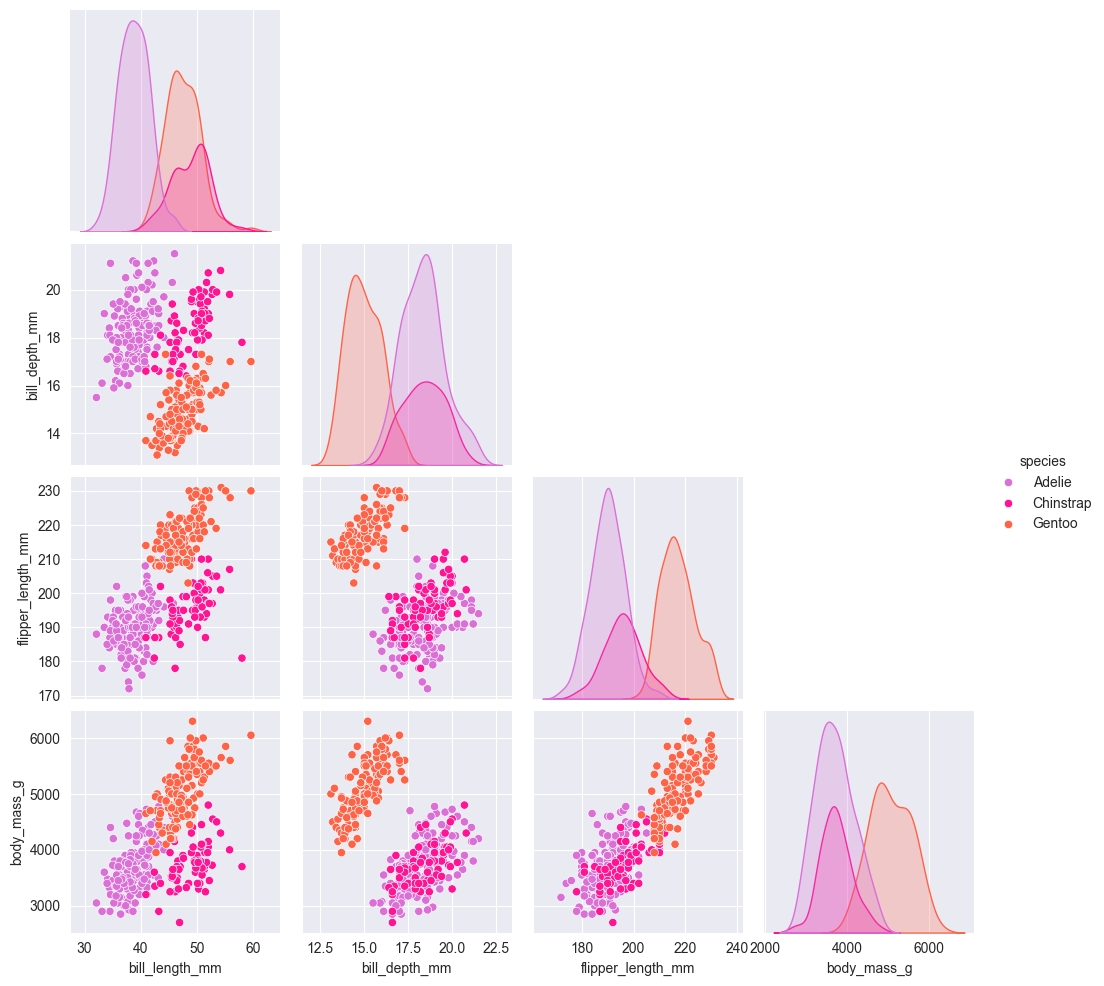

In [160]:
sns.pairplot(penguins,
             hue = 'species',
             palette = ['orchid', 'deeppink', 'tomato'],
             corner = True)

Conforme a plotagem acima através do parâmetro 'hue', é possível determinar 3 grupos distintos em alguns pares de variáveis, tais como:
- body_mass_g x bill_lenght_mm
- flipper_lenght_mm x bill_lenght_mm
- bill_depth_mm x bill_lenght_mm

Assim, a principal determinante aqui é a largura do bico.

# 3 - Realize a padronização dos dados e visualize os dados.

In [88]:
penguins_pad = penguins.copy()
penguins_pad.drop('species', axis = 1, inplace = True)
colunas_pad = penguins_pad.columns
scaler = StandardScaler()
penguins_pad[colunas_pad]=scaler.fit_transform(penguins_pad[colunas_pad])
penguins_pad

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
4,-1.324737,1.089724,-0.563715,-0.938776
5,-0.847812,1.748985,-0.777373,-0.689020
...,...,...,...,...
338,0.601305,-1.750171,0.931890,0.903175
340,0.527932,-1.445897,1.003109,0.809516
341,1.188289,-0.735923,1.501644,1.933419
342,0.234440,-1.192335,0.789451,1.246590


# 4 - Aplique o algoritmo do k means escolhendo o numero de clusters como igual a 3, que é que a quantidade de espécies que temos na base.

In [96]:
k_means_penguins = KMeans(n_clusters = 3, n_init=10, random_state=42)
k_means_penguins.fit(penguins_pad)
centroides_pad =k_means_penguins.cluster_centers_
ctr_orig = scaler.inverse_transform(centroides_pad)
ctr_orig


array([[  47.52528736,   18.76206897,  196.89655172, 3902.01149425],
       [  47.50487805,   14.98211382,  217.18699187, 5076.01626016],
       [  38.20833333,   18.11060606,  188.40151515, 3584.65909091]])

# 5 - Construa pelo 2 matriz de dispersão como realizada em aula indicando os pontos e centroides.

**Comece usando x='bill_length_mm' e y='bill_depth_mm' para analisar o primeiro gráfico e em seguida escolha outras variaveis para o segundo.**

In [155]:
df_clusters = pd.DataFrame({
    'bill_length_mm': penguins['bill_length_mm'],
    'bill_depth_mm': penguins['bill_depth_mm'],
    'body_mass_g': penguins['body_mass_g'],
    'flipper_length_mm': penguins['flipper_length_mm'],
    'cluster': k_means_penguins.labels_
})

custom_colors = {0:'orchid',
                 1: 'deeppink',
                 2: 'tomato'}

df_clusters['color'] = df_clusters['cluster'].map(custom_colors)
df_clusters['species'] = penguins['species']

unique_species = df_clusters['species'].unique()

fig = make_subplots(rows=1, cols = 2)

for species in unique_species:
    df_species = df_clusters[df_clusters['species'] == species]
    color_name = df_species['color'].iloc[0]
    fig.add_traces(go.Scatter(x =df_species['bill_length_mm'],
                          y= df_species['bill_depth_mm'],
                          mode = 'markers',
                          marker=dict(color = color_name),
                              name = species,
                              legendgroup = species
                          ),
               rows=1, cols=1)
    fig.add_traces(go.Scatter(x =df_species['bill_length_mm'],
                          y= df_species['flipper_length_mm'],
                          mode = 'markers',
                          marker=dict(color = color_name),
                              showlegend=False
                          ),
               rows=1, cols=2)



fig.add_traces(go.Scatter(x = ctr_orig[:,0],
                          y= ctr_orig[:,1],
                          mode = 'markers',
                          marker = dict(symbol = 'hexagon',
                                        size = 14,
                                        color = 'turquoise'),
                          name = 'Centroides'),
               rows=1, cols=1)

fig.add_traces(go.Scatter(x = ctr_orig[:,0],
                          y= ctr_orig[:,2],
                          mode = 'markers',
                          marker = dict(symbol = 'hexagon',
                                        size = 14,
                                        color = 'turquoise'),
                          name = 'Centroides',
                          showlegend=False),
               rows=1, cols=2)


fig.update_layout(title_text= 'Clusterização por k-means',
                  xaxis_title = 'bill_length_mm',
                  xaxis2_title = 'bill_length_mm',
                  yaxis_title = 'bill_depth_mm',
                  yaxis2_title = 'flipper_length_mm',
                  legend_title = 'Species')



# 6 - Pesquise mais 3 utilidades de aplicações de algoritmos de clusterização e cite abaixo:

Algoritmos de clusterização podem ser utilizados:
 - No marketing, para segmentação de clientes a partir de comportamento de compra, dados demográficos ou de engajamento, de modo a direcionar o marketing especificamente para cada grupo;
- Em segmentação de imagens, como em exames diagnósticos por imagem em que cada pixel é tratado como um ponto de dado;
- Na biologia, em bioinformática, para encontrar padrões em grandes volumes de dados genômicos.